In [10]:
import platform  # imports go at the top of your script
import os  # start with imports from the standard library followed by a space

import numpy as np  # then import custom/user packages
import pandas as pd  # you can use shorter names for easy reference
import matplotlib.pyplot as plt  # np, pd, and plt are common for these packages

# this is a IPython magic command, you may ignore it
%matplotlib inline  

print(f"My Python version is: {platform.python_version()}")
print(f"My Numpy version is: {np.__version__}")
print(f"My Pandas version is: {pd.__version__}")

My Python version is: 3.13.2
My Numpy version is: 2.2.3
My Pandas version is: 2.2.3


# Pandas: working with data

So that was quite the introduction, for the next section we will use part of the [OpenPowerlifting](https://www.openpowerlifting.org/faq) dataset. You wanted a lot of data so you will get a lot of data - this dataset has 1,343,621ish rows and 37 columns on results of international powerlifting competitions (in 2019, probably more now). That is a lot of data, even when put in a plain text format. You would have a bad time with traditional tools such as Excel, but this is where Pandas shines! 

```{note} 
This notebook uses data from the OpenPowerlifting project, https://www.openpowerlifting.org.
    You may download a copy of the data at https://gitlab.com/openpowerlifting/opl-data.
```

>**Objective:**
>
>Your research objective is to see how the total lifted weight of lifters in the IPF in the world championships has developed over time, to answer this question we will use a real dataset.
>

## Reading data

If you work with real data, you preferably wouldn't construct the DataFrame from scratch like we did before. Pandas has a lot of ways to read data into memory and into a DataFrame. This includes, but is not limited to:

- [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)
- [read_clipboard](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_clipboard.html#pandas.read_clipboard)
- [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel)
- [read_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html#pandas.read_json)
- [read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html#pandas.read_html)
- [read_hdf](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_hdf.html#pandas.read_hdf)
- [read_spss](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_spss.html#pandas.read_spss)

You can pretty much coerce any file into a DataFrame with these methods. You will always need to parse some data yourself, but try to minimize that as much as reasonable (your implementation is probably not as fast as theirs, if it is, send them a pull request).

### Assignment 7

We prepared a subset of the powerlifting data on [here](https://raw.githubusercontent.com/BWM146/Datasets/master/IPF_Worlds.csv). It only contains data from the World Championships for the International Powerlifting Federation.

As this is a comma separated values file we need to import the data using the ``pd.read_csv()`` function. The read_csv function has a lot of optional keyword arguments. Remember to use IPython and Spyder (``ctrl+I``) to help you along!

- **Load the sample dataset as df_ipf from Brightspace or from the link. Simply use ``read_csv()`` on the file path or on the link.**

- **Print the DataFrame.**

You should get something like this:

In [11]:
df_ipf = pd.read_csv("https://raw.githubusercontent.com/BWM146/Datasets/master/IPF_Worlds.csv")
df_ipf

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetName
0,Sergey Fedosienko,M,SBD,Raw,31.5,24-34,24-39,Open,58.20,59,200.0,215.0,225.5,NaN,225.5,150.0,160.0,165.0,NaN,165.0,230.0,255.0,270.5,NaN,270.5,661.0,1,579.90,579.90,567.26,870.42,Yes,Russia,IPF,IPF,2014-06-01,South Africa,NaN,World Classic Powerlifting Championships
1,Dariusz Wszoła,M,SBD,Raw,35.5,35-39,24-39,Open,58.30,59,200.0,210.0,215.0,NaN,215.0,142.5,150.0,152.5,NaN,152.5,197.5,205.0,-210.0,NaN,205.0,572.5,2,501.45,501.45,490.47,741.40,Yes,Poland,IPF,IPF,2014-06-01,South Africa,NaN,World Classic Powerlifting Championships
2,Franklin León,M,SBD,Raw,30.5,24-34,24-39,Open,58.45,59,180.0,192.5,200.0,NaN,200.0,130.0,140.0,-145.0,NaN,140.0,210.0,220.0,-235.0,NaN,220.0,560.0,3,489.31,489.31,478.53,721.77,Yes,Ecuador,IPF,IPF,2014-06-01,South Africa,NaN,World Classic Powerlifting Championships
3,Takaharu Ebihara,M,SBD,Raw,33.5,24-34,24-39,Open,58.70,59,165.0,180.0,185.0,NaN,185.0,130.0,140.0,-142.5,NaN,140.0,200.0,210.0,215.0,NaN,215.0,540.0,4,469.96,469.96,459.49,690.42,Yes,Japan,IPF,IPF,2014-06-01,South Africa,NaN,World Classic Powerlifting Championships
4,Mohamed Lakehal,M,SBD,Raw,31.0,24-34,24-39,Open,58.50,59,195.0,210.0,-215.0,NaN,210.0,105.0,110.0,-112.5,NaN,110.0,200.0,215.0,-220.0,NaN,215.0,535.0,5,467.10,467.10,456.78,685.25,Yes,Algeria,IPF,IPF,2014-06-01,South Africa,NaN,World Classic Powerlifting Championships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,Ina Koolhaas,F,SBD,Raw,71.5,70-74,70-999,Masters 4,60.20,63,-85.0,-85.0,85.0,NaN,85.0,-52.5,52.5,-55.0,NaN,52.5,120.0,127.5,133.5,NaN,133.5,271.0,1,301.36,506.58,266.25,474.80,Yes,Netherlands,IPF,IPF,2019-06-04,Sweden,NaN,World Classic Powerlifting Championships
4658,Tatyana Fomina,F,SBD,Raw,72.5,70-74,70-999,Masters 4,61.60,63,80.0,85.0,87.5,NaN,87.5,42.5,45.0,-47.5,NaN,45.0,105.0,110.0,115.0,NaN,115.0,247.5,2,270.39,464.54,238.83,427.58,Yes,Russia,IPF,IPF,2019-06-04,Sweden,NaN,World Classic Powerlifting Championships
4659,Anne Mari Clausen,F,SBD,Raw,76.5,75-79,70-999,Masters 4,71.60,72,60.0,65.0,70.0,NaN,70.0,42.5,-47.5,-47.5,NaN,42.5,80.0,87.5,92.5,NaN,92.5,205.0,1,200.83,376.76,176.93,332.63,Yes,Norway,IPF,IPF,2019-06-04,Sweden,NaN,World Classic Powerlifting Championships
4660,Shirley Webb,F,SBD,Raw,81.5,80-999,70-999,Masters 4,94.35,84+,30.0,-35.0,40.0,NaN,40.0,25.0,35.0,-37.5,NaN,35.0,80.0,100.0,-120.0,NaN,100.0,175.0,1,148.48,311.21,128.44,263.38,Yes,USA,IPF,IPF,2019-06-04,Sweden,NaN,World Classic Powerlifting Championships


## Inspecting the data

Now it is time to inspect what we are working with. The dataset is also used for the rankings on [openpowerlifting.org](https://www.openpowerlifting.org/). You can use that website to validate what you find in your data. 
It is usually a good idea to spend some time on getting familiar with your data. Familiarizing with your data can prevent you from making mistakes later on and making false (statistical) conclusions.

The first step is always to just look at the data. ``print()``, like we did before is not going to cut it now as the data are way too large to display in console. There are a couple of DataFrame methods that are more suitable for this, namely:
- df.head(): to view the first few rows
- df.tail(): to view the last few rows
- df.columns(): to view the columns we have
- df.describe(): to give a quantitative description of the data
- df.info(): to get information on datatypes and memory usage

### Assignment 8

How much memory are we using? What columns do we have? What datatypes do they contain? You can find out with a very simple command.

- **Please use a method on your DataFrame to find out how much memory the DataFrame uses and print it to the console.**

You should get something like this:

In [12]:
df_ipf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4662 entries, 0 to 4661
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              4662 non-null   object 
 1   Sex               4662 non-null   object 
 2   Event             4662 non-null   object 
 3   Equipment         4662 non-null   object 
 4   Age               4662 non-null   float64
 5   AgeClass          4662 non-null   object 
 6   BirthYearClass    4662 non-null   object 
 7   Division          4662 non-null   object 
 8   BodyweightKg      4662 non-null   float64
 9   WeightClassKg     4662 non-null   object 
 10  Squat1Kg          4661 non-null   float64
 11  Squat2Kg          4643 non-null   float64
 12  Squat3Kg          4575 non-null   float64
 13  Squat4Kg          0 non-null      float64
 14  Best3SquatKg      4603 non-null   float64
 15  Bench1Kg          4651 non-null   float64
 16  Bench2Kg          4634 non-null   float64


As you can see we are using a lot of memory. We will deal with this a little bit later on after we get a feeling of what is in the DataFrame. We see that we have 22 columns with float data and 17 columns with "objects".

### Assignment 9

Visual inspection can be done through fancy graphs, but you could take another step back and just look at the DataFrame itself. One of the methods listed above can be used to inspect the dataframe, please do so.

- **Print the first three rows of the DataFrame. What do you notice?**

You should get something like this:

In [13]:
df_ipf.head(3)

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetName
0,Sergey Fedosienko,M,SBD,Raw,31.5,24-34,24-39,Open,58.20,59,200.0,215.0,225.5,NaN,225.5,150.0,160.0,165.0,NaN,165.0,230.0,255.0,270.5,NaN,270.5,661.0,1,579.90,579.90,567.26,870.42,Yes,Russia,IPF,IPF,2014-06-01,South Africa,NaN,World Classic Powerlifting Championships
1,Dariusz Wszoła,M,SBD,Raw,35.5,35-39,24-39,Open,58.30,59,200.0,210.0,215.0,NaN,215.0,142.5,150.0,152.5,NaN,152.5,197.5,205.0,-210.0,NaN,205.0,572.5,2,501.45,501.45,490.47,741.40,Yes,Poland,IPF,IPF,2014-06-01,South Africa,NaN,World Classic Powerlifting Championships
2,Franklin León,M,SBD,Raw,30.5,24-34,24-39,Open,58.45,59,180.0,192.5,200.0,NaN,200.0,130.0,140.0,-145.0,NaN,140.0,210.0,220.0,-235.0,NaN,220.0,560.0,3,489.31,489.31,478.53,721.77,Yes,Ecuador,IPF,IPF,2014-06-01,South Africa,NaN,World Classic Powerlifting Championships


You probably did not get to see all columns of your DataFrame which is unfortunate. Luckily, there is an [option](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) that let's you display more columns. 

- **Look up the documentation for pd.set_option in Spyder and set the maximum columns to 50. Now inspect the head of the DataFrame again.**

You should get something like this:

In [14]:
pd.set_option('display.max_columns', 50)
df_ipf.head(3)

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetName
0,Sergey Fedosienko,M,SBD,Raw,31.5,24-34,24-39,Open,58.20,59,200.0,215.0,225.5,NaN,225.5,150.0,160.0,165.0,NaN,165.0,230.0,255.0,270.5,NaN,270.5,661.0,1,579.90,579.90,567.26,870.42,Yes,Russia,IPF,IPF,2014-06-01,South Africa,NaN,World Classic Powerlifting Championships
1,Dariusz Wszoła,M,SBD,Raw,35.5,35-39,24-39,Open,58.30,59,200.0,210.0,215.0,NaN,215.0,142.5,150.0,152.5,NaN,152.5,197.5,205.0,-210.0,NaN,205.0,572.5,2,501.45,501.45,490.47,741.40,Yes,Poland,IPF,IPF,2014-06-01,South Africa,NaN,World Classic Powerlifting Championships
2,Franklin León,M,SBD,Raw,30.5,24-34,24-39,Open,58.45,59,180.0,192.5,200.0,NaN,200.0,130.0,140.0,-145.0,NaN,140.0,210.0,220.0,-235.0,NaN,220.0,560.0,3,489.31,489.31,478.53,721.77,Yes,Ecuador,IPF,IPF,2014-06-01,South Africa,NaN,World Classic Powerlifting Championships


What we get is pretty interesting. Powerlifting has three tries per lift, yet we see four tries per lift. This is probably because in some exceptions people get an extra lift (for example when a spotter accidentally touches the weight). If we inspect the column, we see that it contains a lot of missing values, ergo, not many people get a fourth lift. This is in line with what you would expect.

Secondly, we see some negative values. Lifting negative weight should be easy. However, it seems more likely that these negative values are failed attempts. Pretty elegant way of including it in the dataset without using a lot of extra memory!

- **Now print the last five values of the DataFrame**

You should get something like this:

In [15]:
df_ipf.tail(5)

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetName
4657,Ina Koolhaas,F,SBD,Raw,71.5,70-74,70-999,Masters 4,60.20,63,-85.0,-85.0,85.0,NaN,85.0,-52.5,52.5,-55.0,NaN,52.5,120.0,127.5,133.5,NaN,133.5,271.0,1,301.36,506.58,266.25,474.80,Yes,Netherlands,IPF,IPF,2019-06-04,Sweden,NaN,World Classic Powerlifting Championships
4658,Tatyana Fomina,F,SBD,Raw,72.5,70-74,70-999,Masters 4,61.60,63,80.0,85.0,87.5,NaN,87.5,42.5,45.0,-47.5,NaN,45.0,105.0,110.0,115.0,NaN,115.0,247.5,2,270.39,464.54,238.83,427.58,Yes,Russia,IPF,IPF,2019-06-04,Sweden,NaN,World Classic Powerlifting Championships
4659,Anne Mari Clausen,F,SBD,Raw,76.5,75-79,70-999,Masters 4,71.60,72,60.0,65.0,70.0,NaN,70.0,42.5,-47.5,-47.5,NaN,42.5,80.0,87.5,92.5,NaN,92.5,205.0,1,200.83,376.76,176.93,332.63,Yes,Norway,IPF,IPF,2019-06-04,Sweden,NaN,World Classic Powerlifting Championships
4660,Shirley Webb,F,SBD,Raw,81.5,80-999,70-999,Masters 4,94.35,84+,30.0,-35.0,40.0,NaN,40.0,25.0,35.0,-37.5,NaN,35.0,80.0,100.0,-120.0,NaN,100.0,175.0,1,148.48,311.21,128.44,263.38,Yes,USA,IPF,IPF,2019-06-04,Sweden,NaN,World Classic Powerlifting Championships
4661,Margaret Albert,F,SBD,Raw,72.5,70-74,70-999,Masters 4,104.45,84+,57.5,62.5,-65.0,NaN,62.5,45.0,-50.0,-50.0,NaN,45.0,-95.0,NaN,NaN,NaN,NaN,NaN,DQ,NaN,NaN,NaN,NaN,Yes,USA,IPF,IPF,2019-06-04,Sweden,NaN,World Classic Powerlifting Championships


### Assignment 10

You can get information on a column in a DataFrame (Series) with these methods:

- unique: get the unique values from the Series
- nunique: get the number of unique values from the Series
- value_counts: get the, well, value counts of the Series

- **Try all these methods on the Division column and print the outcomes. Remember how to use f-strings? Please use them to increase readability where needed.**

You should get something like this:

In [16]:
print(df_ipf["Division"].unique(), "\n") # \n gives an extra new line after print, increases readability
print(f'There are : {df_ipf["Division"].nunique()} divisions.\n')
print(df_ipf["Division"].value_counts())

['Open' 'Sub-Juniors' 'Juniors' 'Masters 1' 'Masters 2' 'Masters 3'
 'Masters 4'] 

There are : 7 divisions.

Division
Open           1382
Juniors         974
Masters 1       680
Sub-Juniors     626
Masters 2       517
Masters 3       326
Masters 4       157
Name: count, dtype: int64


## Boolean indexing

We will need to narrow our scope a bit. For starters, we don't need all the columns (OK we do but for educational purposes we don't). We also don't need all the rows:

For the next part we will need [boolean](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) array. Pandas (and NumPy, on which Pandas is built) does not use ``and``, ``or``, or ``not``. Instead, it uses ``&``, ``|``, and ``~``, respectively, which are normal, bona fide Python bitwise operators. For example, if we want data for female lifters that are over 80 kg only we can use:

```Python
females_80 = df_ipf[(df_ipf["Sex"] == "F") & 
                    (df_ipf["BodyWeightKg"] > 80)]
```

Be sure to use parentheses when chaining conditions with ``& | ~`` or Pandas will throw an error. This is a very powerful way to select interesting data. Note that, again, you will probably get a view and not a copy.

### Assignment 11

To narrow our scope, we will have to drop some columns. You can either slice and select the columns you want or drop the columns with the ``.drop`` [\[docs\]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) method (the list of included columns is shorter but I want you to use drop 😬). 

```python
to_drop = ['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'Wilks', 'McCulloch', 'TotalKg', 'Event',
           'Tested', 'AgeClass', 'Country', 'Glossbrenner', 'IPFPoints', 'MeetState', 'Place', 'Federation',
           'ParentFederation', 'MeetCountry', 'MeetName']
```

- **Drop the abovementioned columns (look at the docs how to drop the columns).**

- **Make sure the DataFrame only contains data from the "Open" division.**

- **Choose a method to check whether the division only contains "Open".**

- **Did you see what happened to the index? Reset and drop the index and print the first 5 rows.**


You should get something like this:

In [17]:
to_drop = ['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'Wilks', 'McCulloch', 'TotalKg', 'Event',
           'Tested', 'AgeClass', 'Country', 'Glossbrenner', 'IPFPoints', 'MeetState', 'Place', 'Federation',
           'ParentFederation', 'MeetCountry', 'MeetName']

df_ipf.drop(to_drop, axis=1, inplace=True)
df_ipf = df_ipf[(df_ipf["Division"] == "Open")]

print(df_ipf.Division.value_counts())

df_ipf = df_ipf.reset_index(drop=True)
df_ipf.head()

Division
Open    1382
Name: count, dtype: int64


,Name,Sex,Equipment,Age,BirthYearClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Date
0,Sergey Fedosienko,M,Raw,31.5,24-39,Open,58.20,59,200.0,215.0,225.5,NaN,150.0,160.0,165.0,NaN,230.0,255.0,270.5,NaN,2014-06-01
1,Dariusz Wszoła,M,Raw,35.5,24-39,Open,58.30,59,200.0,210.0,215.0,NaN,142.5,150.0,152.5,NaN,197.5,205.0,-210.0,NaN,2014-06-01
2,Franklin León,M,Raw,30.5,24-39,Open,58.45,59,180.0,192.5,200.0,NaN,130.0,140.0,-145.0,NaN,210.0,220.0,-235.0,NaN,2014-06-01
3,Takaharu Ebihara,M,Raw,33.5,24-39,Open,58.70,59,165.0,180.0,185.0,NaN,130.0,140.0,-142.5,NaN,200.0,210.0,215.0,NaN,2014-06-01
4,Mohamed Lakehal,M,Raw,31.0,24-39,Open,58.50,59,195.0,210.0,-215.0,NaN,105.0,110.0,-112.5,NaN,200.0,215.0,-220.0,NaN,2014-06-01


## Simple descriptives

Pandas also comes with a number of useful methods to describe your DataFrame. These methods return the min/max/std/... of the values over the requested axis. These methods help you understand your data.

|Function| 	Description|
|:---------|:----------|
|count()| 	Number of non-null observations|
|sum()| 	Sum of values|
|mean()| 	Mean of Values|
|median()| 	Median of Values|
|mode()| 	Mode of values|
|std()| 	Standard Deviation of the Values|
|min()| 	Minimum Value|
|max()| 	Maximum Value|
|abs()| 	Absolute Value|
|prod()| 	Product of Values|
|cumsum()| 	Cumulative Sum|
|cumprod()|	Cumulative Product|
|quantile()|Value at Quantile|

### Assignment 12

To see how strenght develops over the years we need to know how the maximum lifts developed over time. Step one is getting the maximum lifted weight.

- **Calculate the mean, min, and maximum values for the ``["Squat1Kg", "Squat2Kg", "Squat3Kg", "Squat4Kg"]`` columns using the DataFrame's built-in methods and print them.**
- **Assign the maximum squat, bench, and deadlifts of every person to a new column in the DataFrame using the DataFrame's built-in methods.**
- **Negative values are failed lifts: replace the negative values in the maximum squat, bench and deadlift column with np.NaNs (import numpy if you need to).**
- **Drop the rows containing a NaN in any of the three max lifts with ``.dropna()`` (use the subset keyword argument).**
- **Finally, calculate the total weight lifted with ``.sum()`` and assign it to a new column**


You should get something like this:

In [18]:
print(df_ipf[["Squat1Kg", "Squat2Kg", "Squat3Kg", "Squat4Kg"]].mean(axis=0), "\n")
print(df_ipf[["Squat1Kg", "Squat2Kg", "Squat3Kg", "Squat4Kg"]].min(axis=0), "\n")
print(df_ipf[["Squat1Kg", "Squat2Kg", "Squat3Kg", "Squat4Kg"]].max(axis=0), "\n")

df_ipf["MaxSquat"] = df_ipf[["Squat1Kg", "Squat2Kg", "Squat3Kg", "Squat4Kg"]].max(axis=1)
df_ipf["MaxBench"] = df_ipf[["Bench1Kg", "Bench2Kg", "Bench3Kg", "Bench4Kg"]].max(axis=1)
df_ipf["MaxDeadlift"] = df_ipf[["Deadlift1Kg", "Deadlift2Kg", "Deadlift3Kg", "Deadlift4Kg"]].max(axis=1)

df_ipf.loc[df_ipf["MaxSquat"] <= 0, "MaxSquat"] =  np.nan
df_ipf.loc[df_ipf["MaxBench"] <= 0, "MaxBench"] =  np.nan
df_ipf.loc[df_ipf["MaxDeadlift"] <= 0, "MaxDeadlift"] =  np.nan

df_ipf.dropna(subset=["MaxSquat", "MaxBench", "MaxDeadlift"], inplace=True)

df_ipf['Totalkg'] = df_ipf[["MaxSquat", "MaxBench", "MaxDeadlift"]].sum(axis=1)

print(df_ipf[["MaxSquat", "MaxBench", "MaxDeadlift", "Totalkg"]].head())

Squat1Kg    157.123823
Squat2Kg    126.244905
Squat3Kg     25.316470
Squat4Kg           NaN
dtype: float64 

Squat1Kg   -442.5
Squat2Kg   -440.0
Squat3Kg   -478.0
Squat4Kg      NaN
dtype: float64 

Squat1Kg    450.0
Squat2Kg    470.0
Squat3Kg    460.0
Squat4Kg      NaN
dtype: float64 

   MaxSquat  MaxBench  MaxDeadlift  Totalkg
0     225.5     165.0        270.5    661.0
1     215.0     152.5        205.0    572.5
2     200.0     140.0        220.0    560.0
3     185.0     140.0        215.0    540.0
4     210.0     110.0        215.0    535.0


It's interesting to see that the highest lift in the squat on the second try was higher than the third try. You expect every try to be higher than the previous. This is probably because that person failed his third attempt (the -478).

There is an easier way to get descriptives fast. You can also use the ``.describe()`` method to get a quick overview of your DataFrame.

- **Use the .describe method, what do you notice?**

You should get something like this:

In [19]:
df_ipf.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,MaxSquat,MaxBench,MaxDeadlift,Totalkg
count,1323.000000,1323.000000,1323.000000,1316.000000,1300.000000,0.0,1323.000000,1320.000000,1307.000000,0.0,1323.000000,1313.000000,1284.000000,0.0,1323.000000,1323.000000,1323.000000,1323.000000
mean,30.708995,83.001814,164.027211,133.787614,32.162692,NaN,120.503023,88.092045,7.450650,NaN,205.473167,137.878142,-55.096573,NaN,212.914966,137.458428,234.457294,584.830688
std,6.101695,28.533200,134.962333,177.735143,225.649644,NaN,70.600959,116.638052,149.537946,NaN,105.328889,200.502987,244.867722,NaN,71.938299,53.200334,67.287548,186.447492
min,18.500000,42.950000,-442.500000,-405.000000,-478.000000,NaN,-270.000000,-292.500000,-292.500000,NaN,-355.000000,-380.000000,-400.000000,NaN,67.500000,40.000000,90.000000,210.000000
25%,26.500000,62.155000,130.000000,117.500000,-187.500000,NaN,80.000000,70.000000,-132.500000,NaN,160.000000,137.500000,-272.500000,NaN,150.000000,87.500000,175.000000,412.500000
50%,29.500000,73.850000,190.000000,180.000000,132.500000,NaN,127.500000,110.000000,60.000000,NaN,215.000000,195.000000,-170.000000,NaN,212.500000,137.500000,235.000000,587.500000
75%,34.500000,100.850000,243.750000,250.000000,232.500000,NaN,170.000000,167.500000,150.000000,NaN,275.000000,282.500000,190.000000,NaN,265.000000,180.000000,292.500000,741.250000
max,70.500000,191.500000,450.000000,470.000000,460.000000,NaN,277.500000,282.000000,290.000000,NaN,365.000000,380.000000,398.500000,NaN,470.000000,290.000000,398.500000,1090.000000


What you could or should have noticed is that we lost a bunch of columns. Describe, by default, only included the columns with numerical values. If you also want the descriptives for the other columns we need to motivate Pandas a bit. 

- **Look up the documentation for describe and make sure the np.objects are described.**

You should get something like this:

In [20]:
df_ipf.describe(include=[object])

,Name,Sex,Equipment,BirthYearClass,Division,WeightClassKg,Date
count,1323,1323,1323,1323,1323,1323,1323
unique,800,2,1,6,1,15,7
top,Fang-Yun Su,M,Raw,24-39,Open,74,2019-06-04
freq,7,743,1323,1172,1323,116,249


With this information we can gain a better understanding of our data. We see that the majority of the data is on Men and that our slicing on Division has worked as there is only one value for those present.

## Categories

Pandas understands the concept of categorical variables. One advantage of using categorical variables is the reduced load on memory. Instead of storing a lot of string objects, Pandas can just store some integers and a hash-table for their values. The memory usage of a Categorical is proportional to the number of categories plus the length of the data. In contrast, an object dtype is a constant times the length of the data. Do some searching on the web to find out how we can inspect memory usage and how we can change the type of a column.

### Assignment 13

- **Check the data type of the Sex column with the accessor ``.dtype`` and the memory usage of the Sex column with ``.memory_usage()``.**

- **Convert the column to a category with ``.astype()`` and check the memory usage again.**

- **You probably did this in two lines of code (first convert, then check memory). Do the same, but use method chaining.**


You should get something like this:

In [21]:
print(df_ipf["Sex"].dtype)
print(df_ipf["Sex"].memory_usage(index=False, deep=True), "\n")

df_ipf["Sex"] = df_ipf["Sex"].astype("category")
print(df_ipf["Sex"].memory_usage(index=False, deep=True), "\n")

print(df_ipf["Sex"].astype("category").memory_usage(index=False, deep=True), "\n")

object
66150 

1531 

1531 



Now we have all the years and total lifted weight. Only a few more steps and we can see the development of strength over the years!

## Dates

Dates are hard. Having a computer handle dates is difficult to say the least. Just consider the differences between datetime notation (e.g., MM/DD/YYYY vs. DD/MM/YYYY) between countries and languages, it becomes very complicated, very quickly. Python has a very useful standard library package for handling dates: [datetime](https://docs.python.org/3/library/datetime.html). Pandas can also make use of datetime objects. It even has a special accessor (.dt, remember the .str accessor?) for datetime objects so you easily extract the year, month or day!

### Assignment 14

- **Convert the date column to the datetime datatype with ``pd.to_datetime()``.** 

- **Assign the year to a new column named "Year".**

- **Now access the column and print out the unique years (access it with ``.dt.year``).**

You should get something like this:

In [22]:
df_ipf["Date"] = pd.to_datetime(df_ipf["Date"])

df_ipf["Year"] = df_ipf["Date"].dt.year

print(df_ipf["Year"].unique())

[2014 2016 2017 2013 2015 2018 2019]


## Iterating (repetition)

During the pre-assignment you already learned to iterate over three lists, remember? We will give you a small recap and get more familiar with for loops. The general recipe is:

```python
for <var> in <iterable>:
    <statement(s)>
```

You also already learned to iterate over multiple iterables at the same time with the built-in functions ``zip()`` and ``enumerate()``. If you forgot about it, you can have a look at the pre-assignment again or use you best friend Google. However, what will you do if you need to loop over two iterables and you want to consider each combination of the two iterables? Although for loops are not the fastest, we want to show you how to make a nested for loop:

```python
for <var> in <iterable>:
    for <var> in <iterable>:
        <statement(s)>
```

It will take the first var of the first loop, and then all var's of the second loop. Then it goes back to the first for loop and takes the second var, then runs again all the var's of the second loop. And so on..

### Assignment 15

So let's try out some loops!
````{margin}
```{admonition} Tip
:class: tip
use f-strings so we know what year we are printing!
```
````
- **Define the unique years of the df_ipf and print out the mean Totalkg score and the corresponding year**
- **We hope you noticed that the years are not in ascending order, please rearrange them and print again**
- **Print out the mean and maximal Totalkg score per gender**
- **Let's combine them: print out the mean Totalkg score per year and per gender**

You should get something like this:

In [23]:
years = df_ipf['Year'].unique()
for i in years:
    print(f"{i}: {df_ipf['Totalkg'][df_ipf['Year'] == i].mean()}")
    if i == years[-1]:  # last entry
        print('\n')  # new line for readability

years.sort()  # OR years = sorted(years)
for i in years:
    print(f"{i}: {df_ipf['Totalkg'][df_ipf['Year'] == i].mean()}")
    if i == years[-1]:
        print('\n')

sex = df_ipf['Sex'].unique()
for i in sex:
    print(f"{i} mean: {df_ipf['Totalkg'][df_ipf['Sex'] == i].mean()}")
    print(f"{i} max: {df_ipf['Totalkg'][df_ipf['Sex'] == i].max()}")
    if i == sex[-1]:
        print('\n')
    
for n in sex:
    for i in years:
        print(f"{n}, {i} mean: {(df_ipf['Totalkg'][(df_ipf['Sex'] == n) & (df_ipf['Year'] == i)]).mean()}")


2014: 574.156462585034
2016: 586.9358288770053
2017: 595.9348837209302
2013: 575.0641891891892
2015: 593.5153846153846
2018: 577.1730769230769
2019: 584.5642570281125


2013: 575.0641891891892
2014: 574.156462585034
2015: 593.5153846153846
2016: 586.9358288770053
2017: 595.9348837209302
2018: 577.1730769230769
2019: 584.5642570281125


M mean: 724.1729475100942
M max: 1090.0
F mean: 406.32844827586206
F max: 671.5


M, 2013 mean: 711.3295454545455
M, 2014 mean: 703.1494252873563
M, 2015 mean: 733.2368421052631
M, 2016 mean: 726.347619047619
M, 2017 mean: 723.51171875
M, 2018 mean: 727.7150537634409
M, 2019 mean: 735.5234375
F, 2013 mean: 375.2083333333333
F, 2014 mean: 387.1166666666667
F, 2015 mean: 396.8703703703704
F, 2016 mean: 408.4207317073171
F, 2017 mean: 408.235632183908
F, 2018 mean: 419.86516853932585
F, 2019 mean: 424.8719008264463


## Grouping data

In the previous assignment you already calculated the mean Totalkg score per year and per gender. However, for loops are generally not fast and want to avoid them as much as possible and pandas often had built-in functions for this kind of stuff! We can use the [grouping](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function. Showing it with an example is probably the fastest way!

```Python
df = pd.DataFrame({'Animal' : ['Falcon', 'Falcon',
                                'Parrot', 'Parrot'],
                   'Max Speed' : [380., 370., 24., 26.]})
#   Animal  Max Speed
#0  Falcon      380.0
#1  Falcon      370.0
#2  Parrot       24.0
#3  Parrot       26.0

df.groupby(['Animal'], observed=False).max()
#        Max Speed
#Animal
#Falcon      380.0
#Parrot       26.0
```
We now calculated the maximal value per Animal, but we can also calculate the mean ``.mean()``, standard deviation ``.std()``, the index of the maximal value ``.idxmax()`` and many more. Lastly, pandas makes it really easy to combine multiple calculations with ``.agg()``[docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html):
```python
df.groupby(['Animal'], observed=False).agg(['max', 'mean'])
#        Max Speed    Mean Max Speed       
#Animal
#Falcon      380.0    375.0
#Parrot       26.0    25.0
    
```

So we will repeat the last exercise but with groupby!

### Assignment 16

First look up what the `observed` arugment does and why it is needed. Use the ``.groupby()`` method to examine your data:

- **Group the data for year and calculate the mean Totalkg per year. Print the result.**
- **Make a groupby object for the ``["Sex", "Year"]`` columns and calculate the mean and max Totalkg, print the result.**


You should get something like this:

In [24]:
print(df_ipf[["Totalkg", "Year"]].groupby("Year", observed=False).mean())

print(df_ipf[["Totalkg", "Sex", "Year"]].groupby(["Sex", "Year"], observed=False).agg(['mean', 'max']))

         Totalkg
Year            
2013  575.064189
2014  574.156463
2015  593.515385
2016  586.935829
2017  595.934884
2018  577.173077
2019  584.564257
             Totalkg        
                mean     max
Sex Year                    
F   2013  375.208333   533.5
    2014  387.116667   560.0
    2015  396.870370   615.5
    2016  408.420732   646.0
    2017  408.235632   615.0
    2018  419.865169   671.5
    2019  424.871901   640.0
M   2013  711.329545   920.0
    2014  703.149425   972.5
    2015  733.236842  1000.5
    2016  726.347619  1043.0
    2017  723.511719  1090.0
    2018  727.715054  1083.5
    2019  735.523438   972.5


## timeit

Besides the fact that our code is much more cleaner with ``.groupby()``, for loops are time consuming. We can actually time how long it takes to execute the code with the [%timeit or %%timeit](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) command. 
%timeit works for one line and %%timeit for one cell block (and needs to be on top of the cell block!).
Example:
```python
%timeit 5 + 5
10.8 ns +- 0.798 ns per loop (mean +- std. dev. of 7 runs, 100000000 loops each)

%%timeit
x = 5 + 5
z = x + 10
53 ns +- 8.4 ns per loop (mean +- std. dev. of 7 runs, 10000000 loops each)
```

Let's compare the time needed for the nested for loop and for the groupby function!

### Assignment 17

- **Calculate the mean Totalkg per year and per gender again but time it, which way is faster?**

You should get something like this:

In [25]:
%%timeit
for n in sex:
    for i in years:
        f"{n}, {i} mean: {(df_ipf['Totalkg'][(df_ipf['Sex'] == n) & (df_ipf['Year'] == i)]).mean()}"


1.27 ms ± 28.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [26]:

%timeit df_ipf[["Totalkg", "Sex", "Year"]].groupby(["Sex", "Year"], observed=False).mean() 

664 μs ± 3.32 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


So the groupby function is twice as fast! These few ms do not look like a lot of time gain, but wait till you are going to work on real big data sets! 

But we are there! You calculated the total weight lifted per year and per gender. If we make a nice boxplot, it looks like this (you don't have to do this, this one is on the house):

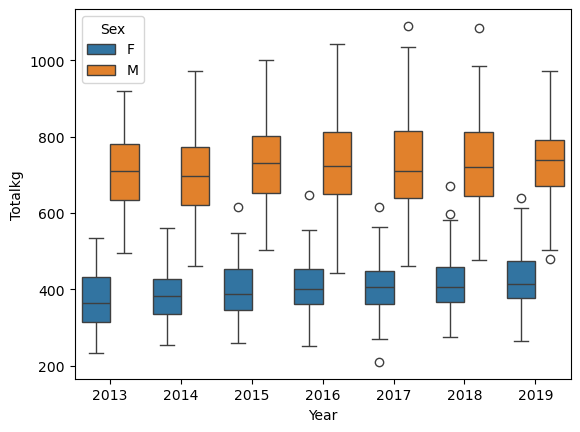

In [27]:
import seaborn as sns

sns.boxplot(x="Year", y="Totalkg", hue="Sex", data=df_ipf)

There you have it! It seems that powerlifting got slightly more competitive in the female population over the years. Of course we cannot draw any statistical conclusions from this, but at least there is a tendency!

